# Predicting Future Sales with Time Series Forecasting

## Import necessary dependencies

In [2]:
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 3.4 MB/s eta 0:00:00


In [4]:
!pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-1.1.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.8 MB)
  Using cached scipy-1.9.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.9 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)


In [8]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 47.6 MB/s eta 0:00:0000:0100:01


In [6]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 101.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 112.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 120.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 83.7 MB/s eta 0:00:00
     ━━━━━

In [2]:
import numpy as np  
import pandas as pd 
import os 
import re
import warnings
from tqdm import tqdm
import datetime as dt

# ML/DL imports
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from numpy import split
from numpy import array

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import keras

# Plotting imports
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

%matplotlib inline
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

from numpy.random import seed
seed(1)
# Allows us to see more information regarding the DataFrame
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

2022-08-11 20:44:44.077248: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-11 20:44:44.077312: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [10]:
#from google.colab import drive
#drive.mount("/content/gdrive", force_remount=True)

## Data Preparation for Modeling

1. Read in the previously saved CSV data 
2. Drop the following columns, `'id', 'dept_id', 'item_id', 'd', 'state_id'` , because they are repetitive and can be derived from `store_id` and `cat_id`.
3. Convert `float64` and `int64 & int32` columns to `np.float32` and `np.int16` to reduce memory storage.


In [ ]:
sales_prices = pd.read_csv('sales_prices.csv')

In [82]:
sales_prices

,date,store_id,item_id,sell_price,d,snap_CA,snap_TX,snap_WI,id,dept_id,cat_id,state_id,sold_units
0,2013-07-13,CA_1,HOBBIES_1_001,9.58,d_897,0.0,1.0,0.0,HOBBIES_1_001_CA_1_validation,HOBBIES_1,HOBBIES,CA,0.0
1,2013-07-14,CA_1,HOBBIES_1_001,9.58,d_898,0.0,0.0,1.0,HOBBIES_1_001_CA_1_validation,HOBBIES_1,HOBBIES,CA,0.0
2,2013-07-15,CA_1,HOBBIES_1_001,9.58,d_899,0.0,1.0,1.0,HOBBIES_1_001_CA_1_validation,HOBBIES_1,HOBBIES,CA,0.0
3,2013-07-16,CA_1,HOBBIES_1_001,9.58,d_900,0.0,0.0,0.0,HOBBIES_1_001_CA_1_validation,HOBBIES_1,HOBBIES,CA,0.0
4,2013-07-17,CA_1,HOBBIES_1_001,9.58,d_901,0.0,0.0,0.0,HOBBIES_1_001_CA_1_validation,HOBBIES_1,HOBBIES,CA,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817688,2014-02-24,TX_1,FOODS_1_194,4.74,d_1123,0.0,0.0,0.0,FOODS_1_194_TX_1_validation,FOODS_1,FOODS,TX,0.0
5817689,2014-02-25,TX_1,FOODS_1_194,4.74,d_1124,0.0,0.0,0.0,FOODS_1_194_TX_1_validation,FOODS_1,FOODS,TX,1.0
5817690,2014-02-26,TX_1,FOODS_1_194,4.74,d_1125,0.0,0.0,0.0,FOODS_1_194_TX_1_validation,FOODS_1,FOODS,TX,0.0
5817691,2014-02-27,TX_1,FOODS_1_194,4.74,d_1126,0.0,0.0,0.0,FOODS_1_194_TX_1_validation,FOODS_1,FOODS,TX,2.0


In [73]:
sell_prices_df = pd.read_csv('sell_prices.csv')
train_sales_df = pd.read_csv('sales_train_validation.csv')
calendar_df = pd.read_csv('calendar.csv')

In [83]:
sales_prices.drop(['id', 'dept_id', 'item_id', 'd', 'state_id',], axis=1, inplace=True)

In [84]:
sales_prices

,date,store_id,sell_price,snap_CA,snap_TX,snap_WI,cat_id,sold_units
0,2013-07-13,CA_1,9.58,0.0,1.0,0.0,HOBBIES,0.0
1,2013-07-14,CA_1,9.58,0.0,0.0,1.0,HOBBIES,0.0
2,2013-07-15,CA_1,9.58,0.0,1.0,1.0,HOBBIES,0.0
3,2013-07-16,CA_1,9.58,0.0,0.0,0.0,HOBBIES,0.0
4,2013-07-17,CA_1,9.58,0.0,0.0,0.0,HOBBIES,0.0
...,...,...,...,...,...,...,...,...
5817688,2014-02-24,TX_1,4.74,0.0,0.0,0.0,FOODS,0.0
5817689,2014-02-25,TX_1,4.74,0.0,0.0,0.0,FOODS,1.0
5817690,2014-02-26,TX_1,4.74,0.0,0.0,0.0,FOODS,0.0
5817691,2014-02-27,TX_1,4.74,0.0,0.0,0.0,FOODS,2.0


In [3]:
sales_prices_reduced = pd.read_csv('sales_prices_reduced.csv')

In [4]:
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

In [5]:
sales_prices_cleaned = downcast_dtypes(sales_prices_reduced)

In [6]:
sales_prices_cleaned

,Unnamed: 0,date,store_id,sell_price,snap_CA,snap_TX,snap_WI,cat_id,sold_units
0,0,2013-07-13,CA_1,9.58,0,1,0,HOBBIES,0.0
1,1,2013-07-14,CA_1,9.58,0,0,1,HOBBIES,0.0
2,2,2013-07-15,CA_1,9.58,0,1,1,HOBBIES,0.0
3,3,2013-07-16,CA_1,9.58,0,0,0,HOBBIES,0.0
4,4,2013-07-17,CA_1,9.58,0,0,0,HOBBIES,0.0
...,...,...,...,...,...,...,...,...,...
46027952,21680,2011-02-28,WI_3,4.00,0,0,0,FOODS,1.0
46027953,21681,2011-03-01,WI_3,4.00,1,1,0,FOODS,2.0
46027954,21682,2011-03-02,WI_3,4.00,1,0,1,FOODS,2.0
46027955,21683,2011-03-03,WI_3,4.00,1,1,1,FOODS,2.0


In [72]:
#mask = (sales_prices_cleaned['date'] > '2013-04-24') & (sales_prices_cleaned['date'] <= '2015-04-24')

In [73]:
#sales_prices_reduced = sales_prices_cleaned.loc[mask]

In [74]:
#sales_prices_cleaned_grouped = sales_prices_reduced.groupby(['date', 'store_id', 'cat_id']).agg({'sold_units': 'sum'}).reset_index()

In [7]:
sales_prices_cleaned_grouped = sales_prices_cleaned.groupby(['date', 'store_id', 'cat_id']).agg({'sold_units': 'sum'}).reset_index()

In [8]:
sales_prices_cleaned_grouped

,date,store_id,cat_id,sold_units
0,2011-01-29,CA_1,FOODS,3239.0
1,2011-01-29,CA_1,HOBBIES,556.0
2,2011-01-29,CA_1,HOUSEHOLD,542.0
3,2011-01-29,CA_2,FOODS,2193.0
4,2011-01-29,CA_2,HOBBIES,538.0
...,...,...,...,...
57385,2016-04-24,WI_2,HOBBIES,235.0
57386,2016-04-24,WI_2,HOUSEHOLD,1233.0
57387,2016-04-24,WI_3,FOODS,3107.0
57388,2016-04-24,WI_3,HOBBIES,251.0


In [9]:
sales_prices_cleaned_grouped.shape

(57390, 4)

In [10]:
len(sales_prices_cleaned_grouped)

57390

## Continued: Data Preparation

1. Concatenate `store_id` and `cat_id` to derive a single column to identify stores and categories. 
2. Pivot the final dataframe with sold units per store and category in store

In [11]:
sales_prices_cleaned_grouped['store_cat_id'] = sales_prices_cleaned_grouped[['store_id', 'cat_id']].apply(lambda x: '_'.join(x), axis=1)

In [12]:
sales_prices_cleaned_grouped.head()

,date,store_id,cat_id,sold_units,store_cat_id
0,2011-01-29,CA_1,FOODS,3239.0,CA_1_FOODS
1,2011-01-29,CA_1,HOBBIES,556.0,CA_1_HOBBIES
2,2011-01-29,CA_1,HOUSEHOLD,542.0,CA_1_HOUSEHOLD
3,2011-01-29,CA_2,FOODS,2193.0,CA_2_FOODS
4,2011-01-29,CA_2,HOBBIES,538.0,CA_2_HOBBIES


In [13]:
len(sales_prices_cleaned_grouped)

57390

In [14]:
sales_prices_cleaned_grouped.drop(['store_id', 'cat_id'], inplace=True, axis=1)

In [15]:
sales_prices_cleaned_grouped.head()

,date,sold_units,store_cat_id
0,2011-01-29,3239.0,CA_1_FOODS
1,2011-01-29,556.0,CA_1_HOBBIES
2,2011-01-29,542.0,CA_1_HOUSEHOLD
3,2011-01-29,2193.0,CA_2_FOODS
4,2011-01-29,538.0,CA_2_HOBBIES


In [16]:
final_store_cat_df = (
    pd.pivot_table(sales_prices_cleaned_grouped, values="sold_units", columns=['store_cat_id'], index=['date'])
    .reset_index()
)

In [17]:
final_store_cat_df = final_store_cat_df.to_csv('final_store_cat_df.csv')

# Start from here to save space on RAM

In [3]:
final_store_cat_df = pd.read_csv('final_store_cat_df.csv', index_col = 'date')

In [4]:
final_store_cat_df.head()

,Unnamed: 0,CA_1_FOODS,CA_1_HOBBIES,CA_1_HOUSEHOLD,CA_2_FOODS,CA_2_HOBBIES,CA_2_HOUSEHOLD,CA_3_FOODS,CA_3_HOBBIES,CA_3_HOUSEHOLD,CA_4_FOODS,CA_4_HOBBIES,CA_4_HOUSEHOLD,TX_1_FOODS,TX_1_HOBBIES,TX_1_HOUSEHOLD,TX_2_FOODS,TX_2_HOBBIES,TX_2_HOUSEHOLD,TX_3_FOODS,TX_3_HOBBIES,TX_3_HOUSEHOLD,WI_1_FOODS,WI_1_HOBBIES,WI_1_HOUSEHOLD,WI_2_FOODS,WI_2_HOBBIES,WI_2_HOUSEHOLD,WI_3_FOODS,WI_3_HOBBIES,WI_3_HOUSEHOLD
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,3239.0,556.0,542.0,2193.0,538.0,763.0,3446.0,550.0,743.0,1223.0,158.0,244.0,1781.0,251.0,524.0,2788.0,385.0,679.0,2284.0,243.0,503.0,1581.0,615.0,508.0,1615.0,190.0,451.0,3028.0,278.0,732.0
2011-01-30,1,3137.0,498.0,520.0,1921.0,397.0,728.0,3535.0,430.0,862.0,1269.0,236.0,272.0,1903.0,264.0,520.0,2870.0,359.0,708.0,2257.0,247.0,502.0,1327.0,443.0,424.0,1433.0,127.0,362.0,3106.0,356.0,736.0
2011-01-31,2,2008.0,415.0,393.0,1289.0,368.0,464.0,2701.0,438.0,646.0,946.0,251.0,189.0,1377.0,107.0,338.0,2082.0,229.0,420.0,1665.0,190.0,370.0,977.0,323.0,262.0,1586.0,113.0,319.0,2543.0,248.0,526.0
2011-02-01,3,2258.0,392.0,401.0,1540.0,350.0,434.0,3064.0,424.0,744.0,1002.0,239.0,199.0,1643.0,248.0,367.0,2180.0,359.0,415.0,1647.0,202.0,320.0,935.0,137.0,179.0,2013.0,124.0,385.0,2596.0,194.0,421.0
2011-02-02,4,2032.0,268.0,330.0,1278.0,296.0,368.0,2761.0,364.0,692.0,1107.0,253.0,176.0,1329.0,102.0,263.0,1890.0,257.0,345.0,1383.0,142.0,201.0,2.0,0.0,0.0,967.0,58.0,150.0,1854.0,74.0,204.0


In [5]:
final_store_cat_df.tail()

,Unnamed: 0,CA_1_FOODS,CA_1_HOBBIES,CA_1_HOUSEHOLD,CA_2_FOODS,CA_2_HOBBIES,CA_2_HOUSEHOLD,CA_3_FOODS,CA_3_HOBBIES,CA_3_HOUSEHOLD,CA_4_FOODS,CA_4_HOBBIES,CA_4_HOUSEHOLD,TX_1_FOODS,TX_1_HOBBIES,TX_1_HOUSEHOLD,TX_2_FOODS,TX_2_HOBBIES,TX_2_HOUSEHOLD,TX_3_FOODS,TX_3_HOBBIES,TX_3_HOUSEHOLD,WI_1_FOODS,WI_1_HOBBIES,WI_1_HOUSEHOLD,WI_2_FOODS,WI_2_HOBBIES,WI_2_HOUSEHOLD,WI_3_FOODS,WI_3_HOBBIES,WI_3_HOUSEHOLD
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-04-20,1908,2490.0,363.0,869.0,2506.0,344.0,841.0,3286.0,534.0,1415.0,1581.0,405.0,514.0,1834.0,273.0,794.0,2196.0,373.0,815.0,2212.0,334.0,769.0,2290.0,326.0,626.0,3005.0,276.0,913.0,2232.0,244.0,683.0
2016-04-21,1909,2533.0,410.0,766.0,2261.0,271.0,771.0,3056.0,540.0,1422.0,1629.0,369.0,460.0,1777.0,219.0,780.0,2239.0,340.0,867.0,2151.0,323.0,906.0,2285.0,397.0,642.0,3078.0,281.0,1034.0,2308.0,203.0,715.0
2016-04-22,1910,2960.0,527.0,900.0,2871.0,485.0,1101.0,3409.0,598.0,1616.0,1751.0,405.0,472.0,1922.0,271.0,829.0,2547.0,388.0,967.0,2370.0,397.0,924.0,2790.0,415.0,786.0,3419.0,303.0,1266.0,2665.0,296.0,867.0
2016-04-23,1911,3655.0,670.0,1252.0,3760.0,542.0,1582.0,4459.0,765.0,2195.0,1971.0,390.0,593.0,2319.0,289.0,1092.0,2930.0,436.0,1117.0,2600.0,497.0,986.0,3242.0,503.0,1027.0,3751.0,282.0,1371.0,3240.0,413.0,1033.0
2016-04-24,1912,4053.0,714.0,1346.0,4012.0,507.0,1563.0,4698.0,670.0,2353.0,2043.0,466.0,762.0,2491.0,372.0,1170.0,2853.0,413.0,1026.0,2421.0,481.0,1055.0,3317.0,574.0,983.0,3659.0,235.0,1233.0,3107.0,251.0,967.0


In [6]:
final_store_cat_df.shape

(1913, 31)

In [7]:
#final_store_cat_df.reset_index()

In [8]:
#final_store_cat_df = final_store_cat_df.reset_index('date')

In [9]:
final_store_cat_df.head()

,Unnamed: 0,CA_1_FOODS,CA_1_HOBBIES,CA_1_HOUSEHOLD,CA_2_FOODS,CA_2_HOBBIES,CA_2_HOUSEHOLD,CA_3_FOODS,CA_3_HOBBIES,CA_3_HOUSEHOLD,CA_4_FOODS,CA_4_HOBBIES,CA_4_HOUSEHOLD,TX_1_FOODS,TX_1_HOBBIES,TX_1_HOUSEHOLD,TX_2_FOODS,TX_2_HOBBIES,TX_2_HOUSEHOLD,TX_3_FOODS,TX_3_HOBBIES,TX_3_HOUSEHOLD,WI_1_FOODS,WI_1_HOBBIES,WI_1_HOUSEHOLD,WI_2_FOODS,WI_2_HOBBIES,WI_2_HOUSEHOLD,WI_3_FOODS,WI_3_HOBBIES,WI_3_HOUSEHOLD
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,3239.0,556.0,542.0,2193.0,538.0,763.0,3446.0,550.0,743.0,1223.0,158.0,244.0,1781.0,251.0,524.0,2788.0,385.0,679.0,2284.0,243.0,503.0,1581.0,615.0,508.0,1615.0,190.0,451.0,3028.0,278.0,732.0
2011-01-30,1,3137.0,498.0,520.0,1921.0,397.0,728.0,3535.0,430.0,862.0,1269.0,236.0,272.0,1903.0,264.0,520.0,2870.0,359.0,708.0,2257.0,247.0,502.0,1327.0,443.0,424.0,1433.0,127.0,362.0,3106.0,356.0,736.0
2011-01-31,2,2008.0,415.0,393.0,1289.0,368.0,464.0,2701.0,438.0,646.0,946.0,251.0,189.0,1377.0,107.0,338.0,2082.0,229.0,420.0,1665.0,190.0,370.0,977.0,323.0,262.0,1586.0,113.0,319.0,2543.0,248.0,526.0
2011-02-01,3,2258.0,392.0,401.0,1540.0,350.0,434.0,3064.0,424.0,744.0,1002.0,239.0,199.0,1643.0,248.0,367.0,2180.0,359.0,415.0,1647.0,202.0,320.0,935.0,137.0,179.0,2013.0,124.0,385.0,2596.0,194.0,421.0
2011-02-02,4,2032.0,268.0,330.0,1278.0,296.0,368.0,2761.0,364.0,692.0,1107.0,253.0,176.0,1329.0,102.0,263.0,1890.0,257.0,345.0,1383.0,142.0,201.0,2.0,0.0,0.0,967.0,58.0,150.0,1854.0,74.0,204.0


In [10]:
#y = final_store_cat_df['CA_1_FOODS']

In [11]:
Cat_CA_1_FOODS = final_store_cat_df[['CA_1_FOODS']].copy()

In [12]:
#Cat_CA_1_FOODS = Cat_CA_1_FOODS.set_index('date')

In [13]:
Cat_CA_1_FOODS.tail()

,CA_1_FOODS
date,
2016-04-20,2490.0
2016-04-21,2533.0
2016-04-22,2960.0
2016-04-23,3655.0
2016-04-24,4053.0


In [14]:
Cat_CA_1_FOODS.shape

(1913, 1)

# LSTM

In [95]:
def split_dataset(data):
    #train, test = data[:1100], data[1100:]
    train, test = data[:-29], data[-29:]
    return train, test

In [96]:
train, test = split_dataset(Cat_CA_1_FOODS)

In [97]:
train


,CA_1_FOODS
date,
2011-01-29,3239.0
2011-01-30,3137.0
2011-01-31,2008.0
2011-02-01,2258.0
2011-02-02,2032.0
...,...
2016-03-22,2598.0
2016-03-23,2554.0
2016-03-24,2681.0


In [98]:
test

,CA_1_FOODS
date,
2016-03-27,3366.0
2016-03-28,2480.0
2016-03-29,2481.0
2016-03-30,2135.0
2016-03-31,2651.0
2016-04-01,3132.0
2016-04-02,3890.0
2016-04-03,4226.0
2016-04-04,3273.0


In [99]:
train.shape

(1884, 1)

In [100]:
test.shape

(29, 1)

In [101]:
print(train.shape)
print(test.shape)


(1884, 1)
(29, 1)


In [102]:
len(train)

1884

In [103]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [104]:
# choose a number of time steps
n_steps_in, n_steps_out = 1, 1

In [105]:
# split into samples
X_train, y_train = split_sequence(train, n_steps_in, n_steps_out)

In [106]:
X_train.shape

(1883, 1, 1)

In [107]:
X_train[0]

array([[3239.]])

In [108]:
X_train[2]

array([[2008.]])

In [109]:
X_train[1]

array([[3137.]])

In [110]:
X_train[-1]

array([[3421.]])

In [111]:
X_train[-2]

array([[2681.]])

In [112]:
y_train.shape

(1883, 1, 1)

In [113]:
y_train[0]

array([[3137.]])

In [114]:

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
#X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

In [115]:
X_train.shape

(1883, 1, 1)

In [116]:
y_train.shape

(1883, 1, 1)

In [117]:
test.shape

(29, 1)

In [118]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu')),
model.add(Dense(n_steps_out)),
model.compile(optimizer='adam', loss='mse')



In [119]:
# fit model
results = model.fit(X_train, y_train, epochs=50, verbose=1, validation_split= 0.2)

Epoch 1/50
48/48 [==============================] - 5s 24ms/step - loss: 7136721.0000 - val_loss: 5290464.5000
Epoch 2/50
48/48 [==============================] - 0s 7ms/step - loss: 1882009.1250 - val_loss: 431758.9688
Epoch 3/50
48/48 [==============================] - 0s 7ms/step - loss: 386628.9688 - val_loss: 377218.7188
Epoch 4/50
48/48 [==============================] - 0s 6ms/step - loss: 383823.4375 - val_loss: 377756.2500
Epoch 5/50
48/48 [==============================] - 0s 6ms/step - loss: 379497.2500 - val_loss: 377926.7812
Epoch 6/50
48/48 [==============================] - 0s 6ms/step - loss: 383587.8125 - val_loss: 377515.4062
Epoch 7/50
48/48 [==============================] - 0s 6ms/step - loss: 382731.9375 - val_loss: 377166.9688
Epoch 8/50
48/48 [==============================] - 0s 6ms/step - loss: 381200.1562 - val_loss: 382912.5000
Epoch 9/50
48/48 [==============================] - 0s 7ms/step - loss: 381678.1875 - val_loss: 377978.9062
Epoch 10/50
48/48 [=====

In [120]:
#convert results to dataframe

history = pd.DataFrame(results.history)
history

,loss,val_loss
0,7.136721e+06,5.290464e+06
1,1.882009e+06,4.317590e+05
2,3.866290e+05,3.772187e+05
3,3.838234e+05,3.777562e+05
4,3.794972e+05,3.779268e+05
5,3.835878e+05,3.775154e+05
6,3.827319e+05,3.771670e+05
7,3.812002e+05,3.829125e+05
8,3.816782e+05,3.779789e+05
9,3.807157e+05,3.771535e+05


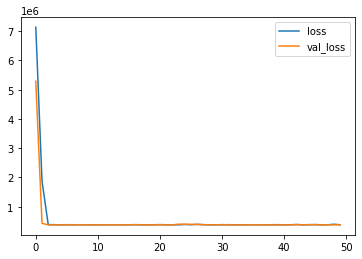

In [121]:

# plot the loss
history['loss'].plot()

# plot the validation loss
history['val_loss'].plot()

plt.legend()

In [122]:
test

,CA_1_FOODS
date,
2016-03-27,3366.0
2016-03-28,2480.0
2016-03-29,2481.0
2016-03-30,2135.0
2016-03-31,2651.0
2016-04-01,3132.0
2016-04-02,3890.0
2016-04-03,4226.0
2016-04-04,3273.0


In [123]:
X_test, y_test = split_sequence(test, n_steps_in, n_steps_out)

In [124]:
X_test.shape

(28, 1, 1)

In [125]:
X_test

array([[[3366.]],

       [[2480.]],

       [[2481.]],

       [[2135.]],

       [[2651.]],

       [[3132.]],

       [[3890.]],

       [[4226.]],

       [[3273.]],

       [[2711.]],

       [[2698.]],

       [[2450.]],

       [[3141.]],

       [[4073.]],

       [[4061.]],

       [[2876.]],

       [[2372.]],

       [[2341.]],

       [[2421.]],

       [[2706.]],

       [[3481.]],

       [[4004.]],

       [[2886.]],

       [[2488.]],

       [[2490.]],

       [[2533.]],

       [[2960.]],

       [[3655.]]])

In [126]:
y_test.shape

(28, 1, 1)

In [127]:
y_test

array([[[2480.]],

       [[2481.]],

       [[2135.]],

       [[2651.]],

       [[3132.]],

       [[3890.]],

       [[4226.]],

       [[3273.]],

       [[2711.]],

       [[2698.]],

       [[2450.]],

       [[3141.]],

       [[4073.]],

       [[4061.]],

       [[2876.]],

       [[2372.]],

       [[2341.]],

       [[2421.]],

       [[2706.]],

       [[3481.]],

       [[4004.]],

       [[2886.]],

       [[2488.]],

       [[2490.]],

       [[2533.]],

       [[2960.]],

       [[3655.]],

       [[4053.]]])

In [128]:
y_test[0]

array([[2480.]])

In [129]:
# demonstrate prediction
#x_input = test.reshape((1, n_steps_in, n_features))
yhat = model.predict(X_test, verbose=0)

In [130]:
yhat

array([[3207.561 ],
       [2366.0415],
       [2366.991 ],
       [2038.3601],
       [2528.4568],
       [2985.3088],
       [3705.2537],
       [4024.3853],
       [3119.23  ],
       [2585.4443],
       [2573.0974],
       [2337.5474],
       [2993.8567],
       [3879.067 ],
       [3867.669 ],
       [2742.1606],
       [2263.4631],
       [2234.0195],
       [2310.0037],
       [2580.6953],
       [3316.787 ],
       [3813.5305],
       [2751.659 ],
       [2373.64  ],
       [2375.5396],
       [2416.3809],
       [2821.944 ],
       [3482.052 ]], dtype=float32)

In [131]:
len(yhat)

28

In [132]:
yhat.shape

(28, 1)

In [133]:
yhat[0]

array([3207.561], dtype=float32)

In [134]:
y_test[1], yhat[1]

(array([[2481.]]), array([2366.0415], dtype=float32))

In [135]:
# To get the accuracy:
#flatten both ytrue and yhat,
#round the yhat
#compare them to each other to get a boolean array (True where the values are the same, False where they are not)
#sum the boolean array and divide by the length (i.e. take the mean)


def get_accuracy(yhat,ytrue):
    acc = sum(ytrue.flatten() == yhat.flatten().round().astype(np.int64))
    return acc/len(ytrue)

In [136]:
get_accuracy(yhat,y_test)

0.0

In [137]:
yhat.shape

(28, 1)

In [138]:
se = np.square(yhat[0] - y_test[0])
mse = np.mean(se)
rmse = np.sqrt(mse)

In [139]:
mse

529345.059877634

In [140]:
rmse

727.56103515625

In [141]:
np.array(yhat)

array([[3207.561 ],
       [2366.0415],
       [2366.991 ],
       [2038.3601],
       [2528.4568],
       [2985.3088],
       [3705.2537],
       [4024.3853],
       [3119.23  ],
       [2585.4443],
       [2573.0974],
       [2337.5474],
       [2993.8567],
       [3879.067 ],
       [3867.669 ],
       [2742.1606],
       [2263.4631],
       [2234.0195],
       [2310.0037],
       [2580.6953],
       [3316.787 ],
       [3813.5305],
       [2751.659 ],
       [2373.64  ],
       [2375.5396],
       [2416.3809],
       [2821.944 ],
       [3482.052 ]], dtype=float32)

In [147]:
yhat.shape

(28, 1)

In [149]:
LSTM_CA_1_FOODS = pd.DataFrame(yhat)

In [150]:
LSTM_CA_1_FOODS

,0
0,3207.561035
1,2366.041504
2,2366.990967
3,2038.360107
4,2528.456787
5,2985.308838
6,3705.253662
7,4024.385254
8,3119.229980
9,2585.444336


In [151]:
LSTM_CA_1_FOODS = LSTM_CA_1_FOODS.to_csv('LSTM_CA_1_FOODS.csv')

In [143]:
from numpy import asarray
from numpy import savetxt

In [144]:
# save array to file

CA_1_FOODS_yhat1 = asarray(yhat)

In [145]:
# save to csv file
savetxt('CA_1_FOODS_LSTM_yhat1.csv', CA_1_FOODS_yhat1, delimiter=',')

In [146]:
# load numpy array from csv file
from numpy import loadtxt
# load array
CA_1_FOODS_yhat1 = loadtxt('CA_1_FOODS_yhat1.csv', delimiter=',')
# print the array
print(CA_1_FOODS_yhat1)

[3787.70239258 3670.62744141 3615.828125   3610.08691406 3675.44335938
 3793.57763672 3831.33178711 3777.91699219 3656.6171875  3590.74731445
 3594.23535156 3678.0871582  3792.2956543  3823.25415039 3759.40600586
 3658.73120117 3580.33642578 3596.09204102 3680.01416016 3779.95117188
 3846.57641602 3776.06884766 3680.82373047 3620.39916992 3614.19506836
 3712.12548828 3820.02563477 3884.13330078]


In [180]:
final_store_cat_df.head()

,Unnamed: 0,CA_1_FOODS,CA_1_HOBBIES,CA_1_HOUSEHOLD,CA_2_FOODS,CA_2_HOBBIES,CA_2_HOUSEHOLD,CA_3_FOODS,CA_3_HOBBIES,CA_3_HOUSEHOLD,CA_4_FOODS,CA_4_HOBBIES,CA_4_HOUSEHOLD,TX_1_FOODS,TX_1_HOBBIES,TX_1_HOUSEHOLD,TX_2_FOODS,TX_2_HOBBIES,TX_2_HOUSEHOLD,TX_3_FOODS,TX_3_HOBBIES,TX_3_HOUSEHOLD,WI_1_FOODS,WI_1_HOBBIES,WI_1_HOUSEHOLD,WI_2_FOODS,WI_2_HOBBIES,WI_2_HOUSEHOLD,WI_3_FOODS,WI_3_HOBBIES,WI_3_HOUSEHOLD
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,3239.0,556.0,542.0,2193.0,538.0,763.0,3446.0,550.0,743.0,1223.0,158.0,244.0,1781.0,251.0,524.0,2788.0,385.0,679.0,2284.0,243.0,503.0,1581.0,615.0,508.0,1615.0,190.0,451.0,3028.0,278.0,732.0
2011-01-30,1,3137.0,498.0,520.0,1921.0,397.0,728.0,3535.0,430.0,862.0,1269.0,236.0,272.0,1903.0,264.0,520.0,2870.0,359.0,708.0,2257.0,247.0,502.0,1327.0,443.0,424.0,1433.0,127.0,362.0,3106.0,356.0,736.0
2011-01-31,2,2008.0,415.0,393.0,1289.0,368.0,464.0,2701.0,438.0,646.0,946.0,251.0,189.0,1377.0,107.0,338.0,2082.0,229.0,420.0,1665.0,190.0,370.0,977.0,323.0,262.0,1586.0,113.0,319.0,2543.0,248.0,526.0
2011-02-01,3,2258.0,392.0,401.0,1540.0,350.0,434.0,3064.0,424.0,744.0,1002.0,239.0,199.0,1643.0,248.0,367.0,2180.0,359.0,415.0,1647.0,202.0,320.0,935.0,137.0,179.0,2013.0,124.0,385.0,2596.0,194.0,421.0
2011-02-02,4,2032.0,268.0,330.0,1278.0,296.0,368.0,2761.0,364.0,692.0,1107.0,253.0,176.0,1329.0,102.0,263.0,1890.0,257.0,345.0,1383.0,142.0,201.0,2.0,0.0,0.0,967.0,58.0,150.0,1854.0,74.0,204.0


In [58]:
CA_1_HOBBIES = final_store_cat_df[['CA_1_HOBBIES']].copy()

In [59]:
def split_dataset(data):
	train, test = data[:1100], data[1100:]
	return train, test

In [60]:
train, test = split_dataset(CA_1_HOBBIES)

In [61]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
#X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

In [62]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [63]:
# split into samples
X_train, y_train = split_sequence(train, n_steps_in, n_steps_out)

In [64]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

In [65]:
# fit model
results = model.fit(X_train, y_train, epochs=50, verbose=1, validation_split= 0.2)

Epoch 1/50
28/28 [==============================] - 2s 20ms/step - loss: 154884.9219 - val_loss: 157142.1250
Epoch 2/50
28/28 [==============================] - 0s 5ms/step - loss: 53993.5430 - val_loss: 16440.6094
Epoch 3/50
28/28 [==============================] - 0s 5ms/step - loss: 16573.9961 - val_loss: 16343.6680
Epoch 4/50
28/28 [==============================] - 0s 4ms/step - loss: 15692.6543 - val_loss: 16178.0010
Epoch 5/50
28/28 [==============================] - 0s 4ms/step - loss: 14920.0068 - val_loss: 14375.0283
Epoch 6/50
28/28 [==============================] - 0s 5ms/step - loss: 13562.5498 - val_loss: 13400.1543
Epoch 7/50
28/28 [==============================] - 0s 5ms/step - loss: 13016.5986 - val_loss: 15553.0615
Epoch 8/50
28/28 [==============================] - 0s 5ms/step - loss: 12566.3496 - val_loss: 12586.8867
Epoch 9/50
28/28 [==============================] - 0s 4ms/step - loss: 12425.2090 - val_loss: 12997.2998
Epoch 10/50
28/28 [========================

In [66]:
#convert results to dataframe

history = pd.DataFrame(results.history)
history

,loss,val_loss
0,154884.921875,157142.125000
1,53993.542969,16440.609375
2,16573.996094,16343.667969
3,15692.654297,16178.000977
4,14920.006836,14375.028320
5,13562.549805,13400.154297
6,13016.598633,15553.061523
7,12566.349609,12586.886719
8,12425.208984,12997.299805
9,12138.056641,13727.047852


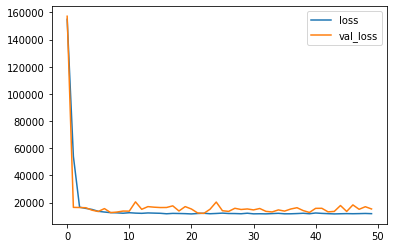

In [67]:
# plot the loss
history['loss'].plot()

# plot the validation loss
history['val_loss'].plot()

plt.legend()

In [68]:
# demonstrate prediction
#x_input = test.reshape((1, n_steps_in, n_features))
yhat = model.predict(X_test, verbose=0)

In [69]:
# To get the accuracy:
#flatten both ytrue and yhat,
#round the yhat
#compare them to each other to get a boolean array (True where the values are the same, False where they are not)
#sum the boolean array and divide by the length (i.e. take the mean)


def get_accuracy(yhat,ytrue):
    acc = sum(ytrue.flatten() == yhat.flatten().round().astype(np.int64))
    return acc/len(ytrue)

In [70]:
get_accuracy(yhat,y_test)

0.0

In [71]:
yhat[0], y_test[0]

(array([2597.3677], dtype=float32), array([[2856.]]))

In [72]:
se = np.square(yhat - y_test)
mse = np.mean(se)
rmse = np.sqrt(mse)

In [73]:
mse

1501480.7106923547

In [74]:
rmse

1225.3492198929882

In [75]:
CA_1_HOUSEHOLD = final_store_cat_df[['CA_1_HOUSEHOLD']].copy()

In [76]:
CA_1_HOUSEHOLD

,CA_1_HOUSEHOLD
date,
2011-01-29,542.0
2011-01-30,520.0
2011-01-31,393.0
2011-02-01,401.0
2011-02-02,330.0
...,...
2016-04-20,869.0
2016-04-21,766.0
2016-04-22,900.0


In [88]:
train, test = split_dataset(CA_1_HOUSEHOLD)

In [89]:
# split into samples
X_train, y_train = split_sequence(train, n_steps_in, n_steps_out)

In [90]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

In [91]:
# fit model
results = model.fit(X_train, y_train, epochs=50, verbose=1, validation_split= 0.2)

Epoch 1/50
28/28 [==============================] - 2s 17ms/step - loss: 355519.5000 - val_loss: 508342.5312
Epoch 2/50
28/28 [==============================] - 0s 8ms/step - loss: 187129.0156 - val_loss: 102541.5938
Epoch 3/50
28/28 [==============================] - 0s 8ms/step - loss: 28067.2383 - val_loss: 41799.8320
Epoch 4/50
28/28 [==============================] - 0s 5ms/step - loss: 22065.8438 - val_loss: 38630.7461
Epoch 5/50
28/28 [==============================] - 0s 5ms/step - loss: 21692.0117 - val_loss: 38437.2891
Epoch 6/50
28/28 [==============================] - 0s 5ms/step - loss: 21487.8594 - val_loss: 38263.4805
Epoch 7/50
28/28 [==============================] - 0s 5ms/step - loss: 21120.9512 - val_loss: 37166.4414
Epoch 8/50
28/28 [==============================] - 0s 5ms/step - loss: 21258.1758 - val_loss: 38187.3945
Epoch 9/50
28/28 [==============================] - 0s 6ms/step - loss: 21157.0527 - val_loss: 37634.5508
Epoch 10/50
28/28 [======================

In [92]:
#convert results to dataframe

history = pd.DataFrame(results.history)
history

,loss,val_loss
0,355519.500000,508342.531250
1,187129.015625,102541.593750
2,28067.238281,41799.832031
3,22065.843750,38630.746094
4,21692.011719,38437.289062
5,21487.859375,38263.480469
6,21120.951172,37166.441406
7,21258.175781,38187.394531
8,21157.052734,37634.550781
9,20541.003906,39692.089844


In [93]:
# demonstrate prediction
#x_input = test.reshape((1, n_steps_in, n_features))
yhat = model.predict(X_test, verbose=0)

In [94]:
# To get the accuracy:
#flatten both ytrue and yhat,
#round the yhat
#compare them to each other to get a boolean array (True where the values are the same, False where they are not)
#sum the boolean array and divide by the length (i.e. take the mean)


def get_accuracy(yhat,ytrue):
    acc = sum(ytrue.flatten() == yhat.flatten().round().astype(np.int64))
    return acc/len(ytrue)

In [95]:
get_accuracy(yhat,y_test)

0.0012315270935960591

In [96]:
se = np.square(yhat - y_test)
mse = np.mean(se)
rmse = np.sqrt(mse)

In [97]:
mse

861156.356760768

In [98]:
rmse

927.9851058938219

# Train TS model with Facebook Prophet

Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [49]:
#!pip install fbprophet

In [67]:
!pip install pystan~=2.14


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 35.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=29313786 sha256=815d5c8c6a7a3e5fa554717c82487227c3d5e3de879d5285708ef4c24c24adb0
  Stored in directory: /home/studio-lab-user/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.5.0
    Uninstalling pystan-3.5.0:
      Successfully uninstalled pystan-3.5.0


In [68]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=717090 sha256=c627f5b904aa52312cae7ebd28b16609d70791d62ff98c55b10d8c27734ac18b
  Stored in directory: /home/studio-lab-user/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988bdaa
Successfully built fbprophet


In [31]:
#!localpip install fbprophet

In [32]:
#!pip install windll


In [66]:
from fbprophet import Prophet

In [67]:
Cat_CA_1_FOODS = Cat_CA_1_FOODS.reset_index()

In [68]:
Cat_CA_1_FOODS

,date,CA_1_FOODS
0,2011-01-29,3239.0
1,2011-01-30,3137.0
2,2011-01-31,2008.0
3,2011-02-01,2258.0
4,2011-02-02,2032.0
...,...,...
1908,2016-04-20,2490.0
1909,2016-04-21,2533.0
1910,2016-04-22,2960.0
1911,2016-04-23,3655.0


In [69]:
#df_final = sales_prices_cleaned_grouped[['date','sold_units','store_cat_id']].rename({'date':'ds','sold_units':'y'},axis='columns')

In [70]:
df_final = Cat_CA_1_FOODS[['date', 'CA_1_FOODS']].rename({'date': 'ds', 'CA_1_FOODS':'y'},axis='columns')

In [71]:
df_final.head()

,ds,y
0,2011-01-29,3239.0
1,2011-01-30,3137.0
2,2011-01-31,2008.0
3,2011-02-01,2258.0
4,2011-02-02,2032.0


In [72]:
#df_final.index.names = ['ds']

In [73]:
df_final

,ds,y
0,2011-01-29,3239.0
1,2011-01-30,3137.0
2,2011-01-31,2008.0
3,2011-02-01,2258.0
4,2011-02-02,2032.0
...,...,...
1908,2016-04-20,2490.0
1909,2016-04-21,2533.0
1910,2016-04-22,2960.0
1911,2016-04-23,3655.0


We fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then you call its fit method and pass in the historical dataframe.



In [74]:
m = Prophet()

In [75]:
m.fit(df_final)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -45.8762
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3991.57    0.00871916        311.86      0.7644      0.7644      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3999.14    0.00305255        82.203           1           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4003.85    0.00936159       114.231           1           1      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     346       4005.21   0.000366582       165.392   4.497e-06       0.001      493  LS failed, Hessian reset 
     381       4005.28   0.000158041       106.931   1.534e-06       0.001      580  LS failed, Hessian reset 
     399       4005.29   2.29109e-06       63.2332      0.3518           1      608   
    Iter      log pro

Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well.

In [76]:
future = m.make_future_dataframe(periods = 28)

In [77]:
future.tail()

,ds
1936,2016-05-18
1937,2016-05-19
1938,2016-05-20
1939,2016-05-21
1940,2016-05-22


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [78]:
forecast = m.predict(future)

In [79]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1936,2016-05-18,2353.741704,1901.025638,2828.287932
1937,2016-05-19,2380.166077,1873.553029,2837.837384
1938,2016-05-20,2851.468359,2351.773576,3331.488545
1939,2016-05-21,3557.298870,3075.179593,4020.412434
1940,2016-05-22,3642.818547,3172.982957,4121.816626


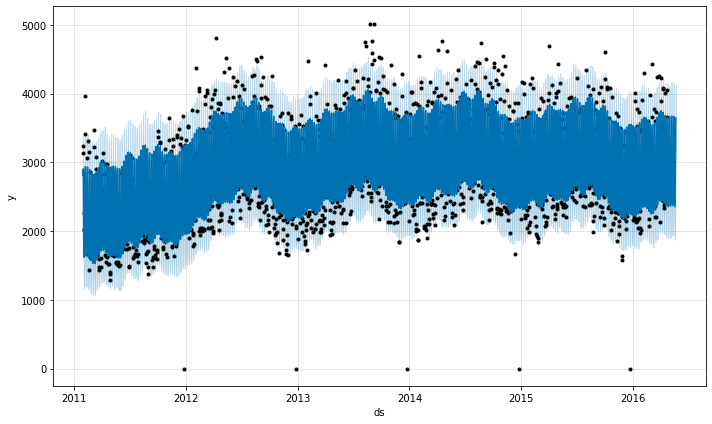

In [80]:
fig1 = m.plot(forecast)

To see the forecast components, we can use the Prophet.plot_components method. By default we’ll see the trend, yearly seasonality, and weekly seasonality of the time series. 

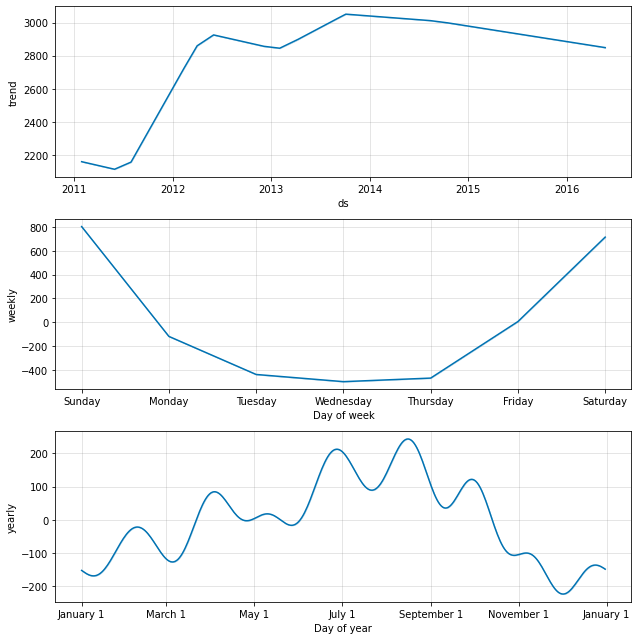

In [81]:
fig2 = m.plot_components(forecast)

In [82]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-29,2160.754129,2388.800998,3294.602061,2160.754129,2160.754129,648.122091,648.122091,648.122091,715.074695,715.074695,715.074695,-66.952604,-66.952604,-66.952604,0.0,0.0,0.0,2808.876220
1,2011-01-30,2160.380020,2440.895232,3392.192234,2160.380020,2160.380020,743.685696,743.685696,743.685696,803.711705,803.711705,803.711705,-60.026009,-60.026009,-60.026009,0.0,0.0,0.0,2904.065716
2,2011-01-31,2160.005910,1524.307751,2429.717578,2160.005910,2160.005910,-172.202387,-172.202387,-172.202387,-118.712846,-118.712846,-118.712846,-53.489541,-53.489541,-53.489541,0.0,0.0,0.0,1987.803524
3,2011-02-01,2159.631801,1217.450181,2133.159208,2159.631801,2159.631801,-485.865275,-485.865275,-485.865275,-438.450595,-438.450595,-438.450595,-47.414679,-47.414679,-47.414679,0.0,0.0,0.0,1673.766526
4,2011-02-02,2159.257692,1170.033508,2084.794195,2159.257692,2159.257692,-540.563584,-540.563584,-540.563584,-498.696116,-498.696116,-498.696116,-41.867468,-41.867468,-41.867468,0.0,0.0,0.0,1618.694108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,2016-05-18,2849.688870,1901.025638,2828.287932,2848.540871,2850.390732,-495.947166,-495.947166,-495.947166,-498.696116,-498.696116,-498.696116,2.748949,2.748949,2.748949,0.0,0.0,0.0,2353.741704
1937,2016-05-19,2849.433069,1873.553029,2837.837384,2848.082740,2850.301050,-469.266992,-469.266992,-469.266992,-468.835154,-468.835154,-468.835154,-0.431837,-0.431837,-0.431837,0.0,0.0,0.0,2380.166077
1938,2016-05-20,2849.177268,2351.773576,3331.488545,2847.499416,2850.234633,2.291091,2.291091,2.291091,5.908311,5.908311,5.908311,-3.617220,-3.617220,-3.617220,0.0,0.0,0.0,2851.468359
1939,2016-05-21,2848.921466,3075.179593,4020.412434,2847.017403,2850.232306,708.377404,708.377404,708.377404,715.074695,715.074695,715.074695,-6.697291,-6.697291,-6.697291,0.0,0.0,0.0,3557.298870


In [83]:
se = np.square(forecast.loc[:, 'yhat'] - Cat_CA_1_FOODS.loc[:, 'CA_1_FOODS'])
mse = np.mean(se)
rmse = np.sqrt(mse)

In [84]:
mse

130940.16740743427

In [85]:
rmse

361.8565563969158

In [86]:
final_store_cat_df.dtypes

Unnamed: 0          int64
CA_1_FOODS        float64
CA_1_HOBBIES      float64
CA_1_HOUSEHOLD    float64
CA_2_FOODS        float64
CA_2_HOBBIES      float64
CA_2_HOUSEHOLD    float64
CA_3_FOODS        float64
CA_3_HOBBIES      float64
CA_3_HOUSEHOLD    float64
CA_4_FOODS        float64
CA_4_HOBBIES      float64
CA_4_HOUSEHOLD    float64
TX_1_FOODS        float64
TX_1_HOBBIES      float64
TX_1_HOUSEHOLD    float64
TX_2_FOODS        float64
TX_2_HOBBIES      float64
TX_2_HOUSEHOLD    float64
TX_3_FOODS        float64
TX_3_HOBBIES      float64
TX_3_HOUSEHOLD    float64
WI_1_FOODS        float64
WI_1_HOBBIES      float64
WI_1_HOUSEHOLD    float64
WI_2_FOODS        float64
WI_2_HOBBIES      float64
WI_2_HOUSEHOLD    float64
WI_3_FOODS        float64
WI_3_HOBBIES      float64
WI_3_HOUSEHOLD    float64
dtype: object

In [87]:
CA_1_HOBBIES

,CA_1_HOBBIES
date,
2011-01-29,556.0
2011-01-30,498.0
2011-01-31,415.0
2011-02-01,392.0
2011-02-02,268.0
...,...
2016-04-20,363.0
2016-04-21,410.0
2016-04-22,527.0


In [88]:
CA_1_HOBBIES = CA_1_HOBBIES.reset_index()

In [90]:
CA_1_HOBBIES

,date,CA_1_HOBBIES
0,2011-01-29,556.0
1,2011-01-30,498.0
2,2011-01-31,415.0
3,2011-02-01,392.0
4,2011-02-02,268.0
...,...,...
1908,2016-04-20,363.0
1909,2016-04-21,410.0
1910,2016-04-22,527.0
1911,2016-04-23,670.0


In [91]:
df_final = CA_1_HOBBIES[['date', 'CA_1_HOBBIES']].rename({'date': 'ds', 'CA_1_HOBBIES':'y'},axis='columns')

In [92]:
m = Prophet()

In [93]:
m.fit(df_final)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -48.3642


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3543.07    0.00102939       115.714       0.217       0.217      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177       3544.53    0.00033044       70.7595   4.459e-06       0.001      268  LS failed, Hessian reset 
     199       3544.54   1.06101e-06       62.0794      0.4326      0.4326      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       3544.54    5.1422e-08       54.7936     0.08459           1      309   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [94]:
future = m.make_future_dataframe(periods = 28)

In [95]:
forecast = m.predict(future)

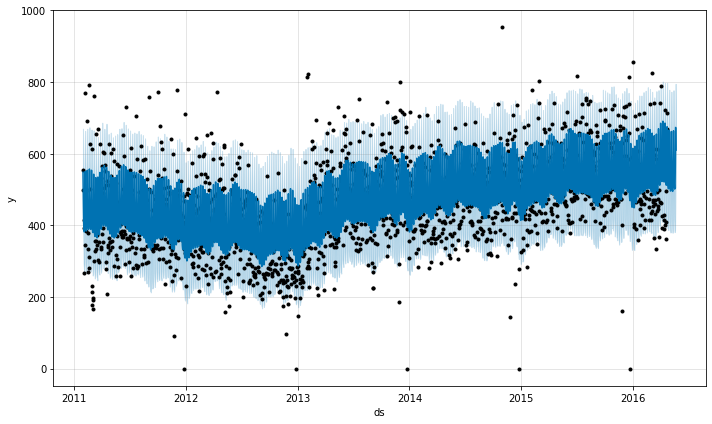

In [96]:
fig1 = m.plot(forecast)

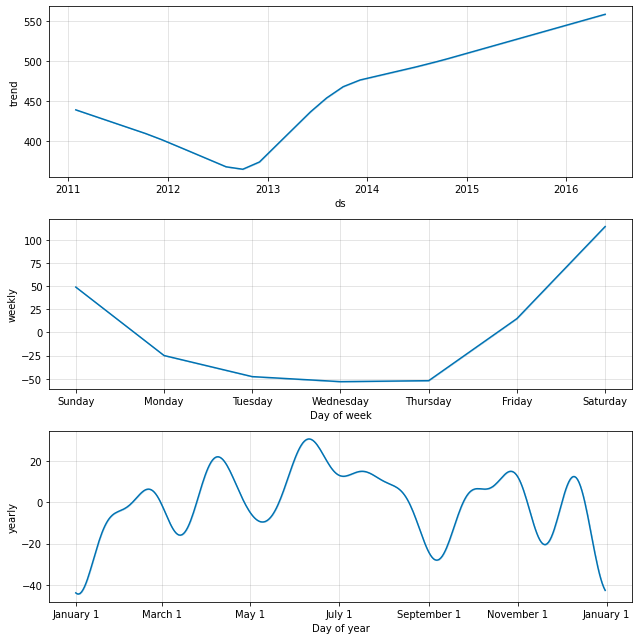

In [97]:
fig2 = m.plot_components(forecast)

In [98]:
se = np.square(forecast.loc[:, 'yhat'] - Cat_CA_1_FOODS.loc[:, 'CA_1_FOODS'])
mse = np.mean(se)
rmse = np.sqrt(mse)

In [99]:
mse

5972735.753197181

In [100]:
rmse

2443.918115076113

# Neural Prophet

NeuralProphet is a python library for modeling time-series data based on neural networks. It’s built on top of PyTorch and is heavily inspired by Facebook Prophet and AR-Net libraries.

According to NeuralProphet’s documentation, the added features are:

Using PyTorch’s Gradient Descent optimization engine making the modeling process much faster than Prophet
Using AR-Net for modeling time-series autocorrelation (aka serial correlation)
Custom losses and metrics
Having configurable non-linear layers of feed-forward neural networks

In [177]:
pip install neuralprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [178]:
pip install neuralprophet[live]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 77.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.8/661.8 kB 77.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [101]:
from neuralprophet import NeuralProphet

In [102]:
df_final = Cat_CA_1_FOODS[['date', 'CA_1_FOODS']].rename({'date': 'ds', 'CA_1_FOODS':'y'},axis='columns')

In [103]:
# model = NeuralProphet(
#     growth="linear",  # Determine trend types: 'linear', 'discontinuous', 'off'
#     changepoints=None, # list of dates that may include change points (None -> automatic )
#     n_changepoints=5,
#     changepoints_range=0.8,
#     trend_reg=0,
#     trend_reg_threshold=False,
#     yearly_seasonality="auto",
#     weekly_seasonality="auto",
#     daily_seasonality="auto",
#     seasonality_mode="additive",
#     seasonality_reg=0,
#     n_forecasts=1,
#     n_lags=0,
#     num_hidden_layers=0,
#     d_hidden=None,     # Dimension of hidden layers of AR-Net
#     learning_rate=None,
#     epochs=40,
#     loss_func="Huber",
#     normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
#     impute_missing=True,
   
# )

In [104]:
model = NeuralProphet()

In [105]:
metrics = model.fit(df_final)


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.948% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.948% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 160
INFO:NP.config:Auto-set epochs to 160


  0%|          | 0/132 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.10E-02, min: 3.36E-01
INFO:NP.utils_torch:lr-range-test results: steep: 8.10E-02, min: 3.36E-01


  0%|          | 0/132 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.10E-02, min: 5.41E-01
INFO:NP.utils_torch:lr-range-test results: steep: 8.10E-02, min: 5.41E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.69E-02
INFO:NP.forecaster:lr-range-test selected learning rate: 8.69E-02
Epoch[160/160]: 100%|██████████| 160/160 [00:16<00:00,  9.81it/s, SmoothL1Loss=0.00369, MAE=258, RMSE=339, RegLoss=0]  


In [106]:
future = model.make_future_dataframe(df_final, periods=365, n_historic_predictions=len(df_final))


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.948% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.948% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


In [107]:
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.956% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.956% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.956% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.956% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Text(0.5, 1.0, 'sales')

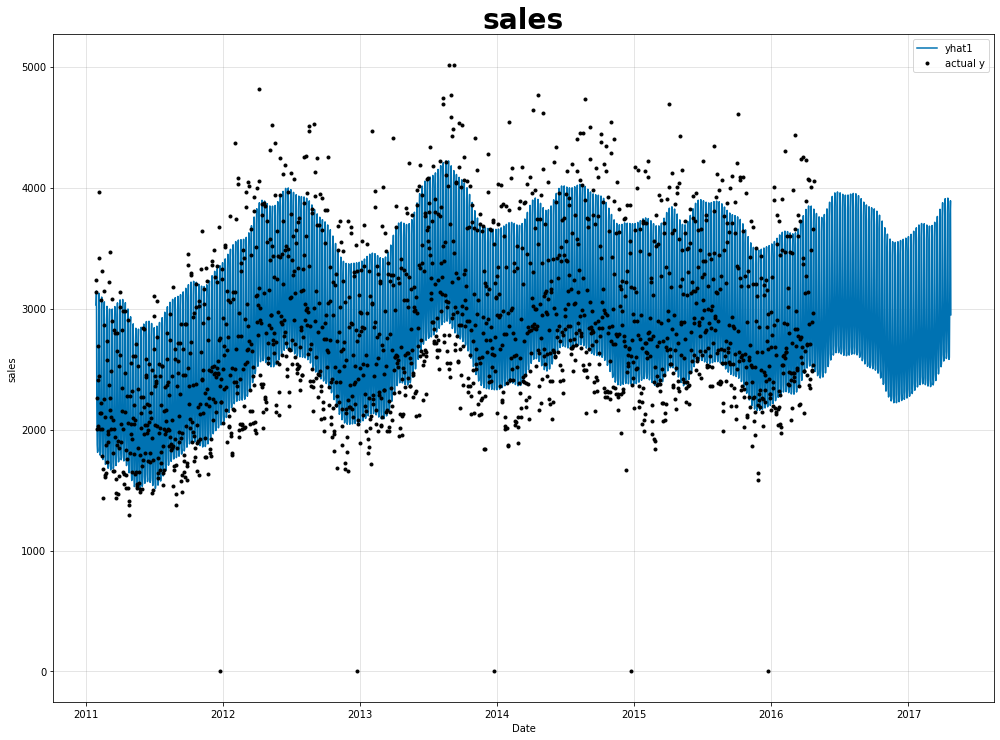

In [108]:
fig, ax = plt.subplots(figsize=(14, 10))
model.plot(forecast, xlabel="Date", ylabel="sales", ax=ax)
ax.set_title("sales", fontsize=28, fontweight="bold")

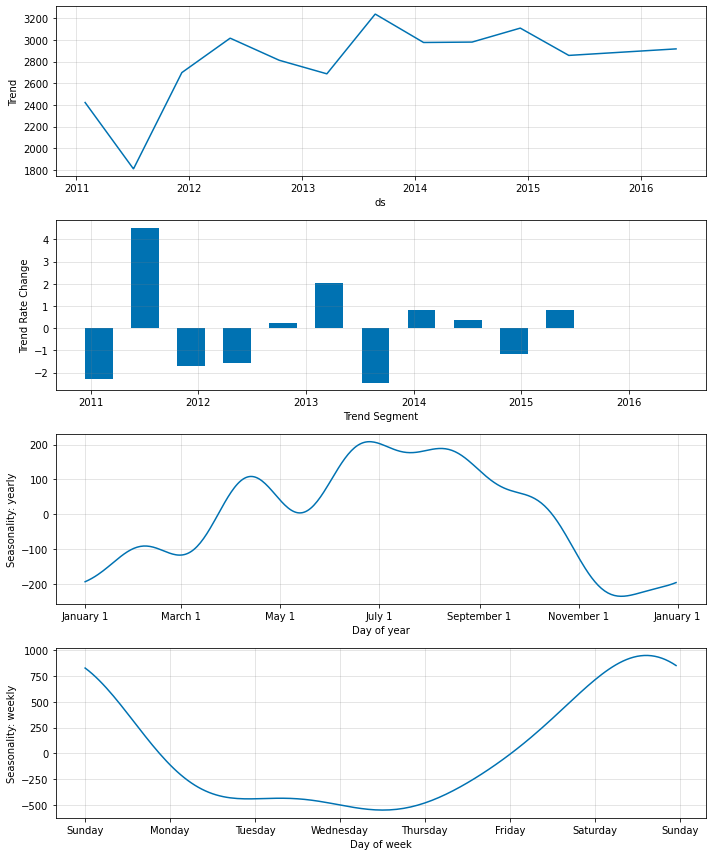

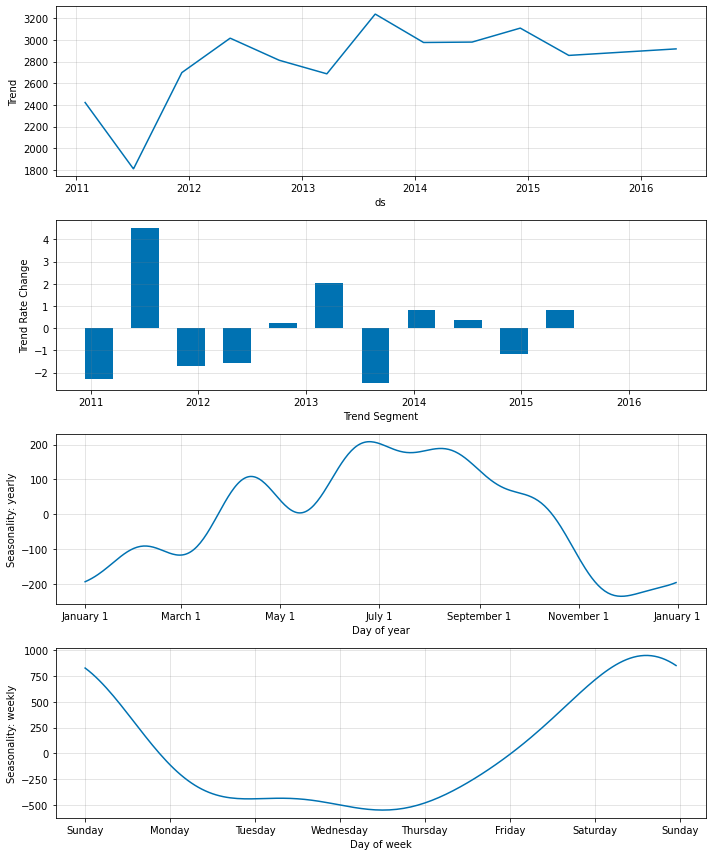

In [109]:
model.plot_parameters()

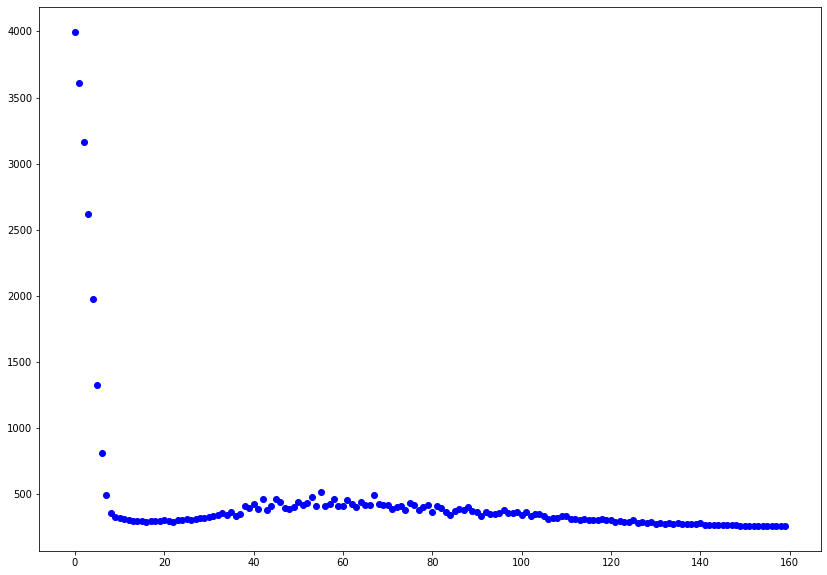

In [112]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metrics["MAE"], 'ob', linewidth=6, label="Training Loss")  
#ax.plot(metrics["MAE_val"], '-r', linewidth=2, label="Validation Loss")


In [113]:
CA_1_HOBBIES

,date,CA_1_HOBBIES
0,2011-01-29,556.0
1,2011-01-30,498.0
2,2011-01-31,415.0
3,2011-02-01,392.0
4,2011-02-02,268.0
...,...,...
1908,2016-04-20,363.0
1909,2016-04-21,410.0
1910,2016-04-22,527.0
1911,2016-04-23,670.0


In [114]:
df_final = CA_1_HOBBIES[['date', 'CA_1_HOBBIES']].rename({'date': 'ds', 'CA_1_HOBBIES':'y'},axis='columns')

In [115]:
model = NeuralProphet()

In [116]:
metrics = model.fit(df_final)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.948% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.948% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 160
INFO:NP.config:Auto-set epochs to 160


  0%|          | 0/132 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.10E-02, min: 1.02E+00
INFO:NP.utils_torch:lr-range-test results: steep: 8.10E-02, min: 1.02E+00


  0%|          | 0/132 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.10E-02, min: 2.87E-01
INFO:NP.utils_torch:lr-range-test results: steep: 8.10E-02, min: 2.87E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.69E-02
INFO:NP.forecaster:lr-range-test selected learning rate: 8.69E-02
Epoch[160/160]: 100%|██████████| 160/160 [00:18<00:00,  8.82it/s, SmoothL1Loss=0.00835, MAE=65.5, RMSE=85.3, RegLoss=0]


In [117]:
future = model.make_future_dataframe(df_final, periods=365, n_historic_predictions=len(df_final))

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.948% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.948% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


In [118]:
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.956% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.956% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.956% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.956% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Text(0.5, 1.0, 'sales')

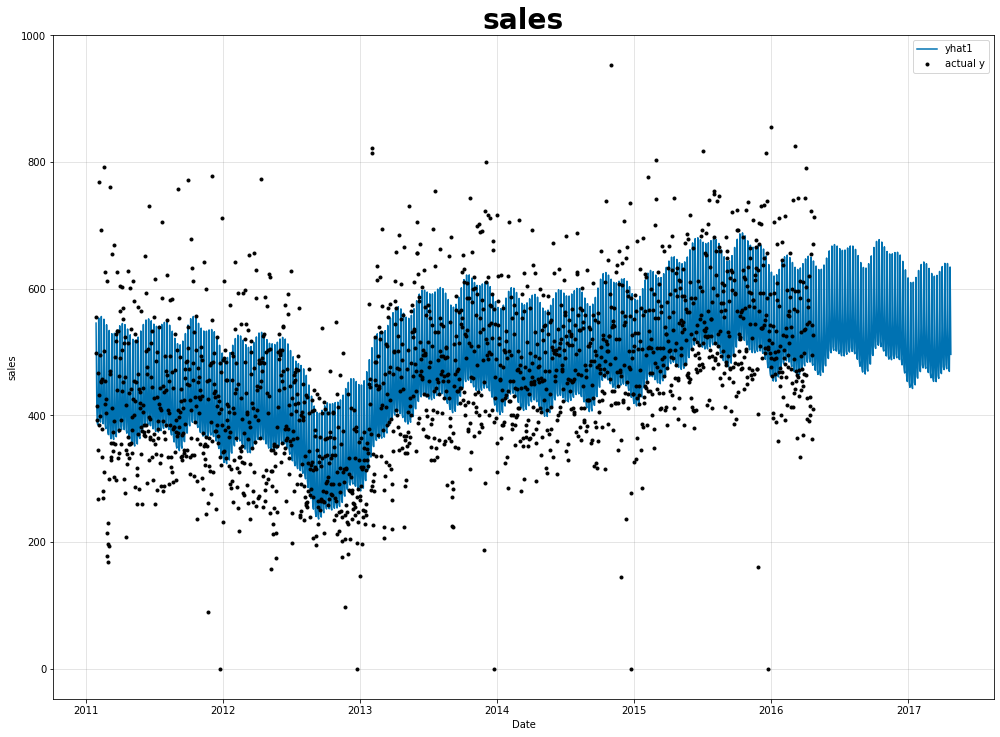

In [119]:
fig, ax = plt.subplots(figsize=(14, 10))
model.plot(forecast, xlabel="Date", ylabel="sales", ax=ax)
ax.set_title("sales", fontsize=28, fontweight="bold")

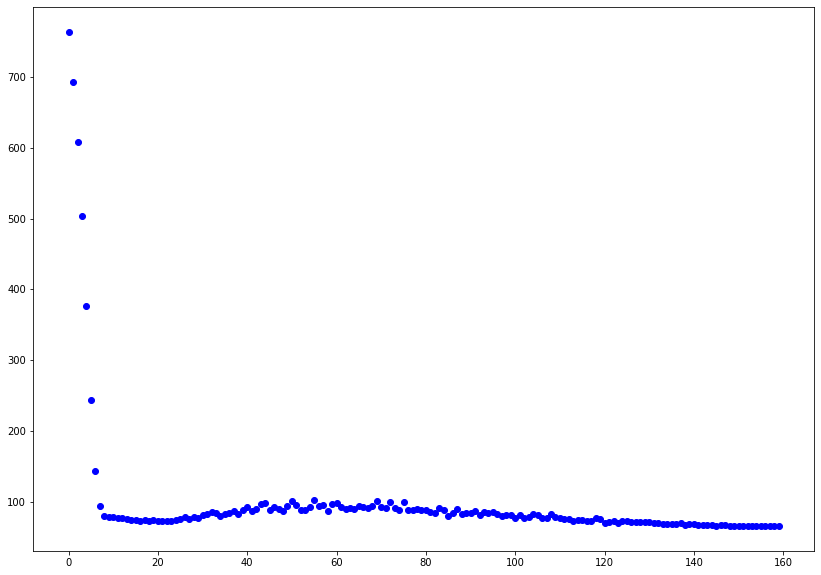

In [120]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metrics["MAE"], 'ob', linewidth=6, label="Training Loss")  
#ax.plot(metrics["MAE_val"], '-r', linewidth=2, label="Validation Loss")

In [121]:
metrics['MAE']

0      763.815768
1      693.358019
2      608.741206
3      503.728233
4      376.293156
5      244.165127
6      142.775513
7       93.397687
8       80.286178
9       78.387747
10      77.623535
11      76.857254
12      76.856869
13      75.347045
14      74.509682
15      74.678914
16      73.262081
17      73.430234
18      73.191916
19      73.892966
20      72.795460
21      73.135795
22      72.301977
23      72.483584
24      74.637202
25      75.884030
26      78.922273
27      75.310137
28      78.767474
29      77.593774
30      80.974763
31      81.944008
32      85.209754
33      83.758797
34      79.444807
35      82.101278
36      83.651925
37      87.475005
38      82.943134
39      88.646507
40      93.141935
41      86.814862
42      90.285985
43      96.096455
44      98.079405
45      88.458347
46      92.917550
47      89.438529
48      86.133872
49      94.029361
50     100.450517
51      95.618679
52      88.547943
53      87.671547
54      92.745986
55     101

In [122]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [125]:
#!pip install statsmodels

# SARIMA

In [126]:
final_store_cat_df = pd.read_csv('final_store_cat_df.csv')

In [127]:
final_store_cat_df

,Unnamed: 0,date,CA_1_FOODS,CA_1_HOBBIES,CA_1_HOUSEHOLD,CA_2_FOODS,CA_2_HOBBIES,CA_2_HOUSEHOLD,CA_3_FOODS,CA_3_HOBBIES,CA_3_HOUSEHOLD,CA_4_FOODS,CA_4_HOBBIES,CA_4_HOUSEHOLD,TX_1_FOODS,TX_1_HOBBIES,TX_1_HOUSEHOLD,TX_2_FOODS,TX_2_HOBBIES,TX_2_HOUSEHOLD,TX_3_FOODS,TX_3_HOBBIES,TX_3_HOUSEHOLD,WI_1_FOODS,WI_1_HOBBIES,WI_1_HOUSEHOLD,WI_2_FOODS,WI_2_HOBBIES,WI_2_HOUSEHOLD,WI_3_FOODS,WI_3_HOBBIES,WI_3_HOUSEHOLD
0,0,2011-01-29,3239.0,556.0,542.0,2193.0,538.0,763.0,3446.0,550.0,743.0,1223.0,158.0,244.0,1781.0,251.0,524.0,2788.0,385.0,679.0,2284.0,243.0,503.0,1581.0,615.0,508.0,1615.0,190.0,451.0,3028.0,278.0,732.0
1,1,2011-01-30,3137.0,498.0,520.0,1921.0,397.0,728.0,3535.0,430.0,862.0,1269.0,236.0,272.0,1903.0,264.0,520.0,2870.0,359.0,708.0,2257.0,247.0,502.0,1327.0,443.0,424.0,1433.0,127.0,362.0,3106.0,356.0,736.0
2,2,2011-01-31,2008.0,415.0,393.0,1289.0,368.0,464.0,2701.0,438.0,646.0,946.0,251.0,189.0,1377.0,107.0,338.0,2082.0,229.0,420.0,1665.0,190.0,370.0,977.0,323.0,262.0,1586.0,113.0,319.0,2543.0,248.0,526.0
3,3,2011-02-01,2258.0,392.0,401.0,1540.0,350.0,434.0,3064.0,424.0,744.0,1002.0,239.0,199.0,1643.0,248.0,367.0,2180.0,359.0,415.0,1647.0,202.0,320.0,935.0,137.0,179.0,2013.0,124.0,385.0,2596.0,194.0,421.0
4,4,2011-02-02,2032.0,268.0,330.0,1278.0,296.0,368.0,2761.0,364.0,692.0,1107.0,253.0,176.0,1329.0,102.0,263.0,1890.0,257.0,345.0,1383.0,142.0,201.0,2.0,0.0,0.0,967.0,58.0,150.0,1854.0,74.0,204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,1908,2016-04-20,2490.0,363.0,869.0,2506.0,344.0,841.0,3286.0,534.0,1415.0,1581.0,405.0,514.0,1834.0,273.0,794.0,2196.0,373.0,815.0,2212.0,334.0,769.0,2290.0,326.0,626.0,3005.0,276.0,913.0,2232.0,244.0,683.0
1909,1909,2016-04-21,2533.0,410.0,766.0,2261.0,271.0,771.0,3056.0,540.0,1422.0,1629.0,369.0,460.0,1777.0,219.0,780.0,2239.0,340.0,867.0,2151.0,323.0,906.0,2285.0,397.0,642.0,3078.0,281.0,1034.0,2308.0,203.0,715.0
1910,1910,2016-04-22,2960.0,527.0,900.0,2871.0,485.0,1101.0,3409.0,598.0,1616.0,1751.0,405.0,472.0,1922.0,271.0,829.0,2547.0,388.0,967.0,2370.0,397.0,924.0,2790.0,415.0,786.0,3419.0,303.0,1266.0,2665.0,296.0,867.0
1911,1911,2016-04-23,3655.0,670.0,1252.0,3760.0,542.0,1582.0,4459.0,765.0,2195.0,1971.0,390.0,593.0,2319.0,289.0,1092.0,2930.0,436.0,1117.0,2600.0,497.0,986.0,3242.0,503.0,1027.0,3751.0,282.0,1371.0,3240.0,413.0,1033.0


In [128]:
final_store_cat_df.drop(('Unnamed: 0'), axis = 1, inplace = True)

In [129]:
data = pd.DataFrame(final_store_cat_df)

In [130]:
data.columns

Index(['date', 'CA_1_FOODS', 'CA_1_HOBBIES', 'CA_1_HOUSEHOLD', 'CA_2_FOODS',
       'CA_2_HOBBIES', 'CA_2_HOUSEHOLD', 'CA_3_FOODS', 'CA_3_HOBBIES',
       'CA_3_HOUSEHOLD', 'CA_4_FOODS', 'CA_4_HOBBIES', 'CA_4_HOUSEHOLD',
       'TX_1_FOODS', 'TX_1_HOBBIES', 'TX_1_HOUSEHOLD', 'TX_2_FOODS',
       'TX_2_HOBBIES', 'TX_2_HOUSEHOLD', 'TX_3_FOODS', 'TX_3_HOBBIES',
       'TX_3_HOUSEHOLD', 'WI_1_FOODS', 'WI_1_HOBBIES', 'WI_1_HOUSEHOLD',
       'WI_2_FOODS', 'WI_2_HOBBIES', 'WI_2_HOUSEHOLD', 'WI_3_FOODS',
       'WI_3_HOBBIES', 'WI_3_HOUSEHOLD'],
      dtype='object')

SARIMA uses past values but also takes into account any seasonality patterns. It brings in seasonality as a parameter.

In [131]:
#splitting in test and training data
data_training = data[:-31]
data_test = data[len(data)-31:]

In [132]:
data_training

,date,CA_1_FOODS,CA_1_HOBBIES,CA_1_HOUSEHOLD,CA_2_FOODS,CA_2_HOBBIES,CA_2_HOUSEHOLD,CA_3_FOODS,CA_3_HOBBIES,CA_3_HOUSEHOLD,CA_4_FOODS,CA_4_HOBBIES,CA_4_HOUSEHOLD,TX_1_FOODS,TX_1_HOBBIES,TX_1_HOUSEHOLD,TX_2_FOODS,TX_2_HOBBIES,TX_2_HOUSEHOLD,TX_3_FOODS,TX_3_HOBBIES,TX_3_HOUSEHOLD,WI_1_FOODS,WI_1_HOBBIES,WI_1_HOUSEHOLD,WI_2_FOODS,WI_2_HOBBIES,WI_2_HOUSEHOLD,WI_3_FOODS,WI_3_HOBBIES,WI_3_HOUSEHOLD
0,2011-01-29,3239.0,556.0,542.0,2193.0,538.0,763.0,3446.0,550.0,743.0,1223.0,158.0,244.0,1781.0,251.0,524.0,2788.0,385.0,679.0,2284.0,243.0,503.0,1581.0,615.0,508.0,1615.0,190.0,451.0,3028.0,278.0,732.0
1,2011-01-30,3137.0,498.0,520.0,1921.0,397.0,728.0,3535.0,430.0,862.0,1269.0,236.0,272.0,1903.0,264.0,520.0,2870.0,359.0,708.0,2257.0,247.0,502.0,1327.0,443.0,424.0,1433.0,127.0,362.0,3106.0,356.0,736.0
2,2011-01-31,2008.0,415.0,393.0,1289.0,368.0,464.0,2701.0,438.0,646.0,946.0,251.0,189.0,1377.0,107.0,338.0,2082.0,229.0,420.0,1665.0,190.0,370.0,977.0,323.0,262.0,1586.0,113.0,319.0,2543.0,248.0,526.0
3,2011-02-01,2258.0,392.0,401.0,1540.0,350.0,434.0,3064.0,424.0,744.0,1002.0,239.0,199.0,1643.0,248.0,367.0,2180.0,359.0,415.0,1647.0,202.0,320.0,935.0,137.0,179.0,2013.0,124.0,385.0,2596.0,194.0,421.0
4,2011-02-02,2032.0,268.0,330.0,1278.0,296.0,368.0,2761.0,364.0,692.0,1107.0,253.0,176.0,1329.0,102.0,263.0,1890.0,257.0,345.0,1383.0,142.0,201.0,2.0,0.0,0.0,967.0,58.0,150.0,1854.0,74.0,204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,2016-03-20,4240.0,493.0,1464.0,1406.0,215.0,679.0,4755.0,688.0,2332.0,2088.0,416.0,645.0,2453.0,320.0,1360.0,3214.0,393.0,1321.0,2815.0,454.0,1098.0,3508.0,462.0,1033.0,4159.0,292.0,1206.0,3120.0,273.0,923.0
1878,2016-03-21,2766.0,532.0,944.0,2245.0,342.0,909.0,4003.0,508.0,1728.0,1700.0,331.0,533.0,1719.0,200.0,838.0,2464.0,297.0,905.0,2290.0,329.0,931.0,2180.0,413.0,656.0,3309.0,219.0,974.0,2234.0,171.0,690.0
1879,2016-03-22,2598.0,440.0,738.0,2514.0,286.0,845.0,3761.0,439.0,1503.0,1602.0,393.0,462.0,1751.0,220.0,846.0,2390.0,361.0,913.0,2260.0,306.0,779.0,2197.0,302.0,534.0,2984.0,222.0,862.0,2185.0,171.0,611.0
1880,2016-03-23,2554.0,454.0,762.0,2177.0,387.0,758.0,3666.0,540.0,1445.0,1598.0,283.0,517.0,1727.0,216.0,911.0,2470.0,452.0,978.0,2241.0,439.0,907.0,2065.0,223.0,463.0,2866.0,229.0,831.0,1898.0,199.0,530.0


In [133]:
data_test

,date,CA_1_FOODS,CA_1_HOBBIES,CA_1_HOUSEHOLD,CA_2_FOODS,CA_2_HOBBIES,CA_2_HOUSEHOLD,CA_3_FOODS,CA_3_HOBBIES,CA_3_HOUSEHOLD,CA_4_FOODS,CA_4_HOBBIES,CA_4_HOUSEHOLD,TX_1_FOODS,TX_1_HOBBIES,TX_1_HOUSEHOLD,TX_2_FOODS,TX_2_HOBBIES,TX_2_HOUSEHOLD,TX_3_FOODS,TX_3_HOBBIES,TX_3_HOUSEHOLD,WI_1_FOODS,WI_1_HOBBIES,WI_1_HOUSEHOLD,WI_2_FOODS,WI_2_HOBBIES,WI_2_HOUSEHOLD,WI_3_FOODS,WI_3_HOBBIES,WI_3_HOUSEHOLD
1882,2016-03-25,3421.0,446.0,1037.0,3177.0,528.0,1091.0,4204.0,550.0,1619.0,1817.0,325.0,479.0,2271.0,270.0,937.0,3179.0,376.0,1045.0,2860.0,390.0,907.0,3503.0,635.0,956.0,3411.0,321.0,1486.0,3063.0,389.0,918.0
1883,2016-03-26,4251.0,610.0,1278.0,4467.0,464.0,1498.0,5333.0,589.0,2056.0,2287.0,375.0,579.0,2556.0,326.0,1141.0,3498.0,408.0,1140.0,3034.0,450.0,1042.0,4325.0,678.0,1147.0,3821.0,292.0,1349.0,3563.0,284.0,1022.0
1884,2016-03-27,3366.0,369.0,934.0,4101.0,492.0,1703.0,4906.0,674.0,2070.0,1823.0,285.0,573.0,3087.0,335.0,1167.0,3447.0,330.0,982.0,2791.0,442.0,755.0,2567.0,334.0,649.0,3141.0,201.0,785.0,3007.0,181.0,863.0
1885,2016-03-28,2480.0,535.0,890.0,2376.0,366.0,903.0,3335.0,528.0,1624.0,1630.0,325.0,490.0,1806.0,232.0,988.0,2403.0,381.0,956.0,2376.0,307.0,854.0,2000.0,326.0,713.0,2853.0,343.0,1058.0,2026.0,212.0,725.0
1886,2016-03-29,2481.0,498.0,809.0,2433.0,490.0,872.0,3493.0,472.0,1528.0,1438.0,361.0,444.0,1556.0,241.0,702.0,1834.0,270.0,795.0,1821.0,318.0,785.0,1892.0,310.0,578.0,2765.0,265.0,1011.0,2478.0,221.0,696.0
1887,2016-03-30,2135.0,465.0,739.0,2360.0,249.0,880.0,3299.0,508.0,1395.0,1371.0,444.0,507.0,1636.0,284.0,881.0,2011.0,317.0,809.0,1787.0,349.0,754.0,1818.0,316.0,558.0,2550.0,229.0,847.0,2050.0,172.0,639.0
1888,2016-03-31,2651.0,536.0,889.0,2340.0,290.0,951.0,3432.0,482.0,1560.0,1518.0,306.0,646.0,1588.0,213.0,830.0,2160.0,318.0,877.0,1983.0,347.0,990.0,1863.0,291.0,704.0,2589.0,338.0,981.0,2003.0,300.0,705.0
1889,2016-04-01,3132.0,743.0,1108.0,3081.0,525.0,1181.0,3977.0,704.0,1890.0,1701.0,325.0,555.0,2038.0,305.0,1046.0,2733.0,391.0,989.0,2742.0,489.0,1119.0,2844.0,514.0,1004.0,3695.0,404.0,2047.0,2684.0,390.0,1180.0
1890,2016-04-02,3890.0,603.0,1384.0,3799.0,576.0,1673.0,4466.0,588.0,2152.0,1920.0,409.0,711.0,2351.0,506.0,1161.0,3087.0,432.0,1266.0,2559.0,485.0,1248.0,3394.0,628.0,1097.0,5090.0,299.0,1680.0,3728.0,337.0,1153.0
1891,2016-04-03,4226.0,790.0,1480.0,4150.0,511.0,1881.0,5171.0,818.0,2410.0,2074.0,332.0,734.0,2677.0,305.0,1293.0,3467.0,478.0,1225.0,2982.0,501.0,1123.0,3648.0,568.0,1154.0,5207.0,309.0,1437.0,4031.0,291.0,1152.0


In [136]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#defining the evaluation metrics
#from: https://mlflow.org/docs/latest/tutorials-and-examples/tutorial.html

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

In [210]:
#!pip install pmdarima

In [137]:
from pmdarima import auto_arima

In [211]:
data_training

,date,CA_1_FOODS,CA_1_HOBBIES,CA_1_HOUSEHOLD,CA_2_FOODS,CA_2_HOBBIES,CA_2_HOUSEHOLD,CA_3_FOODS,CA_3_HOBBIES,CA_3_HOUSEHOLD,CA_4_FOODS,CA_4_HOBBIES,CA_4_HOUSEHOLD,TX_1_FOODS,TX_1_HOBBIES,TX_1_HOUSEHOLD,TX_2_FOODS,TX_2_HOBBIES,TX_2_HOUSEHOLD,TX_3_FOODS,TX_3_HOBBIES,TX_3_HOUSEHOLD,WI_1_FOODS,WI_1_HOBBIES,WI_1_HOUSEHOLD,WI_2_FOODS,WI_2_HOBBIES,WI_2_HOUSEHOLD,WI_3_FOODS,WI_3_HOBBIES,WI_3_HOUSEHOLD
0,2011-01-29,3239.0,556.0,542.0,2193.0,538.0,763.0,3446.0,550.0,743.0,1223.0,158.0,244.0,1781.0,251.0,524.0,2788.0,385.0,679.0,2284.0,243.0,503.0,1581.0,615.0,508.0,1615.0,190.0,451.0,3028.0,278.0,732.0
1,2011-01-30,3137.0,498.0,520.0,1921.0,397.0,728.0,3535.0,430.0,862.0,1269.0,236.0,272.0,1903.0,264.0,520.0,2870.0,359.0,708.0,2257.0,247.0,502.0,1327.0,443.0,424.0,1433.0,127.0,362.0,3106.0,356.0,736.0
2,2011-01-31,2008.0,415.0,393.0,1289.0,368.0,464.0,2701.0,438.0,646.0,946.0,251.0,189.0,1377.0,107.0,338.0,2082.0,229.0,420.0,1665.0,190.0,370.0,977.0,323.0,262.0,1586.0,113.0,319.0,2543.0,248.0,526.0
3,2011-02-01,2258.0,392.0,401.0,1540.0,350.0,434.0,3064.0,424.0,744.0,1002.0,239.0,199.0,1643.0,248.0,367.0,2180.0,359.0,415.0,1647.0,202.0,320.0,935.0,137.0,179.0,2013.0,124.0,385.0,2596.0,194.0,421.0
4,2011-02-02,2032.0,268.0,330.0,1278.0,296.0,368.0,2761.0,364.0,692.0,1107.0,253.0,176.0,1329.0,102.0,263.0,1890.0,257.0,345.0,1383.0,142.0,201.0,2.0,0.0,0.0,967.0,58.0,150.0,1854.0,74.0,204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,2016-03-20,4240.0,493.0,1464.0,1406.0,215.0,679.0,4755.0,688.0,2332.0,2088.0,416.0,645.0,2453.0,320.0,1360.0,3214.0,393.0,1321.0,2815.0,454.0,1098.0,3508.0,462.0,1033.0,4159.0,292.0,1206.0,3120.0,273.0,923.0
1878,2016-03-21,2766.0,532.0,944.0,2245.0,342.0,909.0,4003.0,508.0,1728.0,1700.0,331.0,533.0,1719.0,200.0,838.0,2464.0,297.0,905.0,2290.0,329.0,931.0,2180.0,413.0,656.0,3309.0,219.0,974.0,2234.0,171.0,690.0
1879,2016-03-22,2598.0,440.0,738.0,2514.0,286.0,845.0,3761.0,439.0,1503.0,1602.0,393.0,462.0,1751.0,220.0,846.0,2390.0,361.0,913.0,2260.0,306.0,779.0,2197.0,302.0,534.0,2984.0,222.0,862.0,2185.0,171.0,611.0
1880,2016-03-23,2554.0,454.0,762.0,2177.0,387.0,758.0,3666.0,540.0,1445.0,1598.0,283.0,517.0,1727.0,216.0,911.0,2470.0,452.0,978.0,2241.0,439.0,907.0,2065.0,223.0,463.0,2866.0,229.0,831.0,1898.0,199.0,530.0


In [138]:
#dictionary to store results
Optimization_Model = {}


#Loop to optimize model for all series
for i in range(1,7):
    
    #defining the time series
    series = pd.Series(data.iloc[:, i])
    series.index = data["date"]
    
    #Checking for zero days as these dont work in an ETS model with multiplicativ components, 
    #and turning thm into the mean of the day before and after
    for day in range(0, len(series)):
        if series[day] <= 0:
            series[day] = ( series[day-1] + series[day+1] ) /2
    
    series_training = pd.Series(data_training.iloc[:, i])
    series_training.index = data_training["date"]
    
    series_test = pd.Series(data_test.iloc[:, i])
    series_test.index = data_test["date"]
     
    print(series.name)

    #Running the SARIMAX Model
    
    model_sarima = auto_arima(y=series_training, 
                       seasonal=True,
                       m=7,#weekly seasonality has the length 7
                       stepwise=True) #uses the  stepwise algorithm outlined in Hyndman and Khandakar (2008) 
    
    model_arima = auto_arima(y=series_training,
                       stepwise=True) 
    
    print(model_sarima.summary())
    print(model_arima.summary())
    
    #Creating model forecast
    forecast_point_sarima = model_sarima.predict(n_periods=31,return_conf_int=False)
    forecast_point_arima = model_arima.predict(n_periods=31,return_conf_int=False)
    
    #Extract fitted values
    fitted_point_sarima = model_sarima.predict_in_sample(n_periods=len(series_training),return_conf_int=False)
    fitted_point_arima = model_arima.predict_in_sample(n_periods=len(series_training),return_conf_int=False)
    
    #Metrics 
    SARIMA_fit = eval_metrics(series_training,fitted_point_sarima)
    SARIMA_forecast = eval_metrics(series_test[0:31],forecast_point_sarima[0:31])
    
    ARIMA_fit = eval_metrics(series_training,fitted_point_arima)
    ARIMA_forecast = eval_metrics(series_test[0:31],forecast_point_arima[0:31])
    
    print("Goodness of Fit SARIMA:",SARIMA_fit)
    print("Forecasting accuracy SARIMA:",SARIMA_forecast)
    
    print("Goodness of Fit ARIMA:",ARIMA_fit)
    print("Forecasting accuracy ARIMA:",ARIMA_forecast)
    
    #choosing Model
    if SARIMA_forecast[2] >= ARIMA_forecast[2]:
        Optimization_Model[series.name] = {'order': model_sarima.order, 
                                           'seasonal order': model_arima.seasonal_order,
                                          'mae': SARIMA_forecast[0],
                                          'rmse': SARIMA_forecast[1],
                                          'r2': SARIMA_forecast[2] }
        
        forecast = pd.Series(forecast_point_sarima,index=series_test.index)
        fit = pd.Series(fitted_point_sarima,index=series_training.index)
        
    else:
        Optimization_Model[series.name] = {'order': model_arima.order, 
                                           'seasonal order': 'None',
                                          'mae': ARIMA_forecast[0],
                                          'rmse': ARIMA_forecast[1],
                                          'r2': ARIMA_forecast[2] }
        
        forecast = pd.Series(forecast_point_arima,index=series_test.index)
        fit = pd.Series(fitted_point_arima,index=series_training.index)
        
    

CA_1_FOODS
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1882
Model:             SARIMAX(5, 1, 0)x(2, 0, 0, 7)   Log Likelihood              -13635.347
Date:                           Tue, 09 Aug 2022   AIC                          27286.695
Time:                                   10:19:53   BIC                          27331.011
Sample:                                        0   HQIC                         27303.017
                                          - 1882                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4040      0.020    -20.498      0.000      -0.443      -0.365
ar.L2         -0.2984      0.022

In [139]:
Optimization_Model

{'CA_1_FOODS': {'order': (4, 1, 5),
  'seasonal order': 'None',
  'mae': 262.4071179870394,
  'rmse': 217.86353276423455,
  'r2': 0.8359139498773915},
 'CA_1_HOBBIES': {'order': (1, 1, 1),
  'seasonal order': (0, 0, 0, 0),
  'mae': 114.03995017596014,
  'rmse': 92.9833628959545,
  'r2': 0.036666965972150245},
 'CA_1_HOUSEHOLD': {'order': (5, 1, 0),
  'seasonal order': (0, 0, 0, 0),
  'mae': 109.7702797636801,
  'rmse': 81.34078423415042,
  'r2': 0.776358460520225},
 'CA_2_FOODS': {'order': (3, 1, 0),
  'seasonal order': (0, 0, 0, 0),
  'mae': 444.1251958039545,
  'rmse': 338.2097247518208,
  'r2': 0.610501821446351},
 'CA_2_HOBBIES': {'order': (5, 1, 3),
  'seasonal order': 'None',
  'mae': 79.69761323953105,
  'rmse': 65.82487037221802,
  'r2': 0.36957865585514427},
 'CA_2_HOUSEHOLD': {'order': (1, 1, 2),
  'seasonal order': (0, 0, 0, 0),
  'mae': 228.14873986543603,
  'rmse': 203.64475409102735,
  'r2': 0.5315963666763452}}